In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
%matplotlib inline

In [3]:
num_states = 48
num_actions = 4
actions = ['left', 'right', 'up', 'down']
epsilon = 0.1
alpha = 0.5
start = [0, 0]
goal = [11, 0]

def take_step(state, action):
    reward = -1
    
    if (action == 'left'):
        new_state = [state[0]-1, state[1]]
    elif (action == 'right'):
        new_state = [state[0]+1, state[1]]
    elif (action == 'up'):
        new_state = [state[0], state[1]+1]
    elif (action == 'down'):
        new_state = [state[0], state[1]-1]
    
    if (new_state[0] < 0 or new_state[0] > 11 or new_state[1] < 0 or new_state[1] > 3):
        new_state = state
    if (check_cliff(new_state)):
        reward = -100
        new_state = start
    
    return new_state, reward
    
def check_cliff(state):
    cliff = False
    if (state[1] == 0):
        if (state[0] > 0 and state[0] < 11):
            cliff = True
    return cliff
    
def check_terminal(state):
    if (state == goal):
        return True
    else:
        return False
    
def take_epsilon_greeedy_step(state, q_values):
    state_ = make_1d(state)
    if (random.uniform(0, 1) > epsilon):
        action_ind = np.argmax(q_values[state_, :])
        action = actions[action_ind]
    else:
        action = random.choice(actions)
    return action

def make_1d(state):
    return ((state[1] * 12) + state[0])

In [4]:
def sarsa(num_episodes):
    q_sa = np.zeros((num_states, num_actions))
    avg_reward = np.zeros((num_episodes))
    
    for i in range(num_episodes):
        current_state = start
        action = take_epsilon_greeedy_step(current_state, q_sa)
            
        while(not check_terminal(current_state)):
            new_state, reward = take_step(current_state, action)
            avg_reward[i] += reward
            new_action = take_epsilon_greeedy_step(new_state, q_sa)
            q_sa[make_1d(current_state), actions.index(action)] += alpha * (reward + q_sa[make_1d(new_state), actions.index(new_action)] - q_sa[make_1d(current_state), actions.index(action)])
            current_state = new_state
            action = new_action
        avg_reward[i] = max(avg_reward[i], -100)
        
    return avg_reward

In [5]:
def q_learning(num_episodes):
    q_sa = np.zeros((num_states, num_actions))
    avg_reward = np.zeros((num_episodes))
    
    for i in range(num_episodes):
        current_state = start
            
        while(not check_terminal(current_state)):
            action = take_epsilon_greeedy_step(current_state, q_sa)
            new_state, reward = take_step(current_state, action)
            avg_reward[i] += reward
            new_action_ind = np.argmax(q_sa[make_1d(new_state)])
            new_action = actions[new_action_ind]
            q_sa[make_1d(current_state), actions.index(action)] += alpha * (reward + q_sa[make_1d(new_state), actions.index(new_action)] - q_sa[make_1d(current_state), actions.index(action)])
            current_state = new_state
        avg_reward[i] = max(avg_reward[i], -100)
        
    return avg_reward

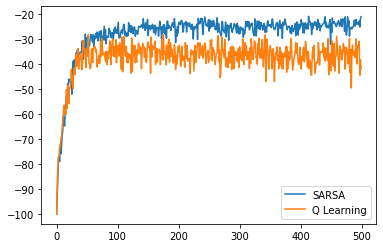

In [6]:
runs = 100

sarsa_rewards = []
for i in range(runs):
    average_rewards = sarsa(500)
    sarsa_rewards.append(average_rewards)
sarsa_rewards = np.asarray(sarsa_rewards)
sarsa_final = np.sum(sarsa_rewards, axis=0) / runs

qlearning_rewards = []
for i in range(runs):
    average_rewards = q_learning(500)
    qlearning_rewards.append(average_rewards)
qlearning_rewards = np.asarray(qlearning_rewards)
qlearning_final = np.sum(qlearning_rewards, axis=0) / runs

plt.plot(sarsa_final, label='SARSA')
plt.plot(qlearning_final, label='Q Learning')
plt.legend()
plt.show()